# Mask2Maps

MR,

Febrero 2022

version 0.1


In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from matplotlib import image as image
from tqdm import tqdm
from scipy import misc
from PIL import Image


In [2]:
clss = ['back', 'skin', 
        'neck',
        'eye_g',
        'l_ear', 'r_ear',
        'mouth', 'nose',
        'u_lip', 'l_lip',
        'r_brow', 'l_brow',
        'l_eye', 'r_eye',
        'cloth', 
        'hair',
        'ear_r', 
        'neck_l',
        'hat',
        ]

classes = {n: i for i,n in enumerate(clss)}
classes

{'back': 0,
 'skin': 1,
 'neck': 2,
 'eye_g': 3,
 'l_ear': 4,
 'r_ear': 5,
 'mouth': 6,
 'nose': 7,
 'u_lip': 8,
 'l_lip': 9,
 'r_brow': 10,
 'l_brow': 11,
 'l_eye': 12,
 'r_eye': 13,
 'cloth': 14,
 'hair': 15,
 'ear_r': 16,
 'neck_l': 17,
 'hat': 18}

In [3]:
clsnames = {classes[c]:c for c in classes}
num_classes=len(clsnames.keys())
num_classes

19

In [4]:
INPUT_DIMS = (256,256,3)
maps_dims  = (num_classes,512,512)


In [5]:
imgs_dir =  "/home/mariano/Data/CelebAMask-HQ/CelebA-HQ-img-256"
masks_dir = "/home/mariano/Data/CelebAMask-HQ/CelebAMask-HQ-mask-anno/"
maps_dir =  "/home/mariano/Data/CelebAMask-HQ/CelebA-HQ-maps-512"

In [6]:
def mapas(imgs_dir, masks_dir, maps_dir, maps_dims): 
    ''' 

    maps_dims  :  (numclases, nunrows, numcols) 
    ''' 
    classmap = np.zeros(maps_dims) 

    imgs_files = glob(os.path.join(imgs_dir, '*.jpg')) 
    imgs_files.sort() 
    for i, imf in enumerate(tqdm(imgs_files)):  
        # Para cada archivo de rostro CelebA 
        path,file = os.path.split(imf) 
        shortname, ext = os.path.splitext(file) 
        longname = '{:05d}'.format(int(shortname)) 

        img = np.array(Image.open(imf))/255 
        maps_dirs  = glob(os.path.join(masks_dir,'*')) 
        maps_dirs.sort() 

        #print(maps_dir)     

        # a cada archivo  
        for dr in maps_dirs: 
            # Buscar las msk subcada directorio  
            maps_files = glob(os.path.join(dr,longname+'*.png')) 
            if len(maps_files)==0: continue # si no hay mascaras va al siguiente directorio 

            # una vez que encontramos las mascaras de la imagen de rostro 
            classmap.fill(0)  #limpiamos el acumulados de mascaras 
            classmap[0] = 1 
            for fn in maps_files: 
                data = np.array(Image.open(fn))/255 
                mpath,mfile = os.path.split(fn) 
                fname, ext = os.path.splitext(mfile) 
                val = classes[fname[6:]]  
                #msk = data[:,:,0] 
                classmap[val]=data[:,:,0]*(val+1) 
                #print(fn, name[6:], val) 

            mask = classmap.argmax(axis=0) 
            im_mask = Image.fromarray((mask*10).astype(np.uint8))
            filename= os.path.join(maps_dir, shortname+'.png') 
            im_mask.save(filename)
            
        #if i==10: break
            
    return img, classmap, mask
    

In [7]:
img, classmap, mask=mapas(imgs_dir, masks_dir, maps_dir, maps_dims)

100%|███████████████████████████████████| 30000/30000 [2:47:49<00:00,  2.98it/s]


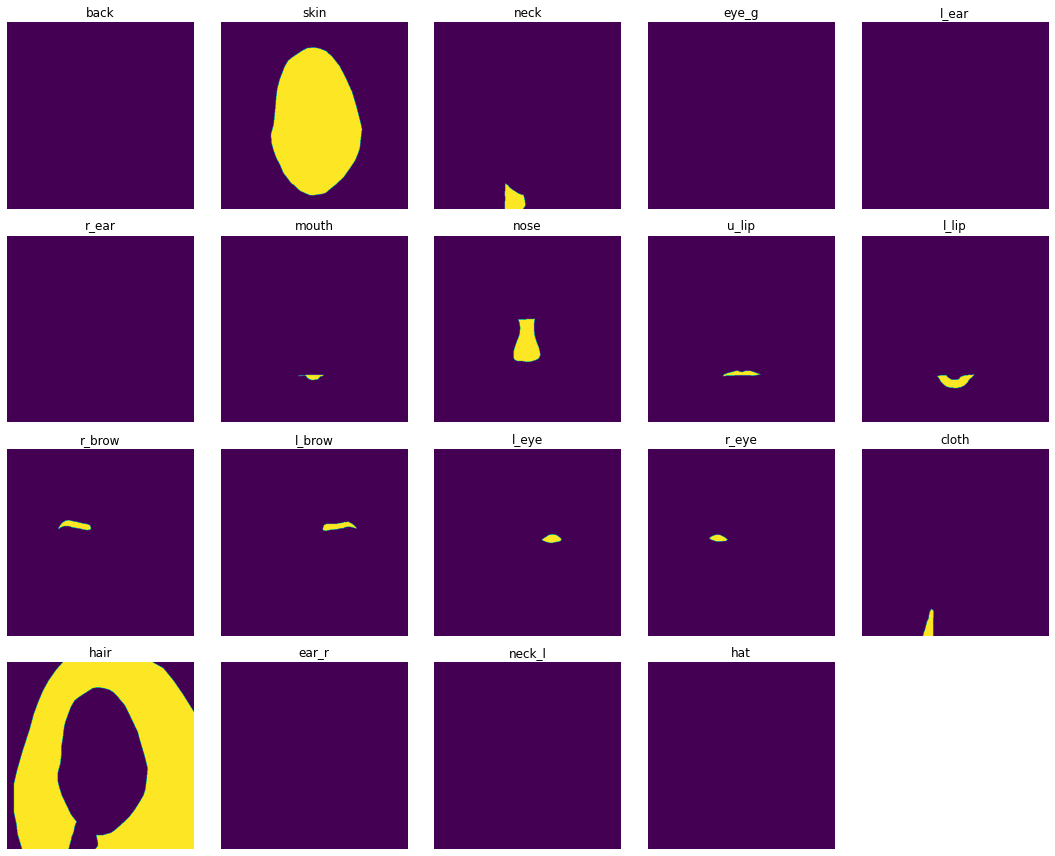

In [8]:
mskrows = int(np.sqrt(num_classes))
mskcols = int(np.ceil(num_classes/mskrows))
plt.figure(figsize=(3*mskcols,3*mskrows))
for i in range(num_classes):
    plt.subplot(mskrows,mskcols,i+1)
    plt.imshow(classmap[i])
    plt.title(clsnames[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

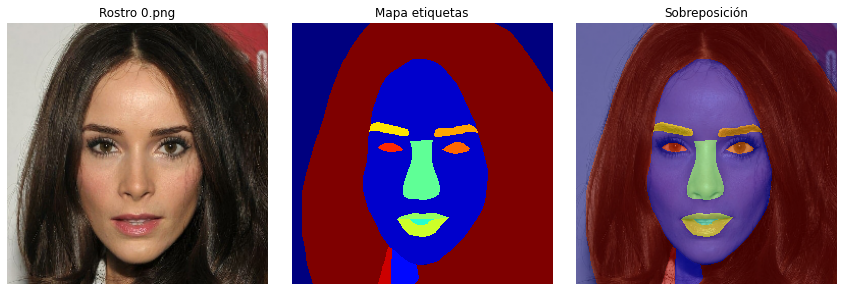

In [10]:
extent = (0,512,0,512)
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img, extent=extent)
plt.axis('off')
plt.title('Rostro 0.png')

plt.subplot(132)
plt.imshow(mask, cmap='jet',interpolation='nearest', extent=extent)
plt.axis('off')
plt.title('Mapa etiquetas')

plt.subplot(133)
plt.imshow(img, extent=extent)
plt.imshow(mask, cmap='jet', alpha=.5, interpolation='nearest', extent=extent)
plt.axis('off')
plt.title('Sobreposición')

plt.tight_layout()
plt.show()
#plt.savefig('segmap.png')